## Big Mama Test

Author: Mohamed Tahar Belkheir

In [1]:

# Data processing
import pandas as pd
import numpy as np
from math import log

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Model selection
from sklearn.preprocessing import RobustScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle


# Predictive models
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier

# Evaluation metrics
import sklearn.metrics
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score




f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load the data

In [2]:
train = pd.read_csv('data/train.csv', dtype = {'support_id':'O'})
test = pd.read_csv('data/test.csv',  dtype = {'support_id':'O'})

In [3]:
train.head()

,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
0,1430158023,VT56YgANZ5sK24hIAgB7+w==,a2304e2d-dd95-4431-a06e-9b976b83781f,CAESEJ5yQ9WDEoC_KMd3DzKeKl0,320x480,200000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544489,280000000,116000000,0
1,1430158024,VT56ZAAAeWMKNCwO6ABg+w==,fdef5b70-64c3-4afa-8e0e-8587bd4887e2,CAESEJ6WxEBHVaDXLlrXknLTCoA,320x480,1000000,app,353599677,1,ios,tr_TR,iphone,408,1462,1109,16,544489,280000000,195000000,0
2,1430158024,VT56ZAALt/oKG+GTGwB6sg==,db4cfc36-27f7-4e92-8201-d71d9b4d6cf7,CAESEPcNDSPNESnmoWp1Zck6j8A,320x480,199000000,app,911152486,1,ios,fr_FR,ipod,937,926,1462,1536,544489,280000000,241000000,0
3,1430158024,VT56ZAAMtH0KwmKp4AANng==,e113e09f-1899-4f97-94ac-00e243d8ef70,CAESELMvW0Vh_8Uwsio5w99n4qk,320x480,190000000,app,911793120,1,ios,fr_FR,iphone,937,1462,1536,1461,544489,280000000,137000000,0
4,1430158024,VT56ZAAOT5QKfN8IfAAieQ==,96653962-3033-476b-9dff-95d188f52d6d,CAESEKhcSWjJJHrkM-XAEDNaxgE,320x480,188000000,app,484115113,1,ios,fr_FR,iphone,61,13,299,0,544489,280000000,188000000,0


In [4]:
test.head()

,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430264861,VUAbtwAKfUwKG+JOugBfTw==,20189672-3ca0-48f8-957f-b2400005fea2,CAESEO1swnwzbyP_ulp5I6dwI9w,320x480,1000000,app,606697013,1,ios,en_EN,iphone,675,1462,0,0,544501,220000000,184000000
1,1430264862,VUAbuAANjzkKwo3v1AB++g==,8f46fac0-8893-4547-8ec7-028b4812057a,CAESEMgZsfgjSKT7GvZNAtFJaAs,320x480,1000000,app,905455244,1,ios,fr_FR,iphone,926,1462,1536,1071,544477,220000000,198000000
2,1430264862,VUAbuQAA39MKwuUk0wBMBQ==,692cb285-3ed0-4294-afda-fefb7a877238,CAESECYlSHMNcbKaLUtv2aXuBYw,320x480,197000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544501,220000000,197000000
3,1430264862,VUAbuQAB6HoKG+HGlQAW1w==,81f53cbd-0a22-4b94-87fb-8f3f4ef8148f,CAESEIM8HpwwPdYg_1FhZwa9sHo,320x480,198000000,app,911152486,1,ios,fr_FR,iphone,937,926,1462,1536,544501,220000000,208000000
4,1430264862,VUAbuQAJO6cKGxPLvQB1Sw==,cab4ae17-6b48-483e-ba68-ad49c8d944a0,CAESEK2HiR6F1ncLdKqp_F6vOF8,320x480,1000000,app,506916707,1,ios,en_EN,iphone,386,384,13,1379,544501,220000000,107000000


In [5]:
print('The Train shape is {}\nThe Test shape is {}'.format(train.shape,test.shape))

The Train shape is (762239, 20)
The Test shape is (508158, 19)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762239 entries, 0 to 762238
Data columns (total 20 columns):
timestamp          762239 non-null int64
bidid              762239 non-null object
device_id          762239 non-null object
user_id            762239 non-null object
format             762239 non-null object
bidfloor           762239 non-null int64
support_type       762239 non-null object
support_id         762239 non-null object
device_type        762239 non-null int64
device_os          762239 non-null object
device_language    762239 non-null object
device_model       762239 non-null object
verticals_0        762239 non-null int64
verticals_1        762239 non-null int64
verticals_2        762239 non-null int64
vertical_3         762239 non-null int64
ad_id              762239 non-null int64
bid_price          762239 non-null int64
won_price          762239 non-null int64
clicked            762239 non-null int64
dtypes: int64(11), object(9)
memory usage: 116.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508158 entries, 0 to 508157
Data columns (total 19 columns):
timestamp          508158 non-null int64
bidid              508158 non-null object
device_id          508158 non-null object
user_id            508158 non-null object
format             508158 non-null object
bidfloor           508158 non-null int64
support_type       508158 non-null object
support_id         508158 non-null object
device_type        508158 non-null int64
device_os          508158 non-null object
device_language    508158 non-null object
device_model       508158 non-null object
verticals_0        508158 non-null int64
verticals_1        508158 non-null int64
verticals_2        508158 non-null int64
vertical_3         508158 non-null int64
ad_id              508158 non-null int64
bid_price          508158 non-null int64
won_price          508158 non-null int64
dtypes: int64(10), object(9)
memory usage: 73.7+ MB


Both train and test datasets look to have no missing values, thus, we won't care about imputing data in this model

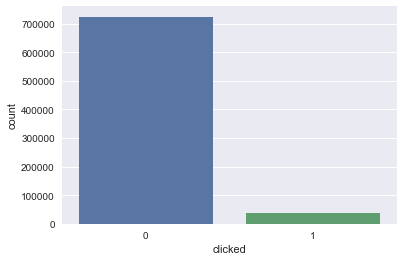

In [8]:
# visualize the target variable "Clicked"
sns.countplot(x='clicked',data=train)

In [9]:
train['clicked'].value_counts()

0    724386
1     37853
Name: clicked, dtype: int64

In [10]:
ratio = int(train['clicked'].value_counts(normalize=True)[0]/train['clicked'].value_counts(normalize=True)[1])
print("The ratio of 'not clicked' to 'clicked' is {}:1".format(ratio))

The ratio of 'not clicked' to 'clicked' is 19:1


It is clear that there is a large class unbalance. We would explore the techniques of : Under/Over sampling. Since the dataset is large, the technique that will be used is uders sampling. In order to keep validation error small, Boostrap sampling will be used with stacked or voting ensemble model

## Features exploration

In [11]:
print('The features are:\n\n',train.columns)

The features are:

 Index(['timestamp', 'bidid', 'device_id', 'user_id', 'format', 'bidfloor',
       'support_type', 'support_id', 'device_type', 'device_os',
       'device_language', 'device_model', 'verticals_0', 'verticals_1',
       'verticals_2', 'vertical_3', 'ad_id', 'bid_price', 'won_price',
       'clicked'],
      dtype='object')


In [12]:
data = [train,test]

In [13]:
def drop_features(train_test,*args):
    for f in args:
        data[0].drop(f,axis=1,inplace=True)
        data[1].drop(f,axis=1,inplace=True)
        
def cardinality(data, *args):
    print('Calculating cardinality for {}\n'.format(data[0]))
    for item in args:
        print('cardinality of {} is {}'.format(item, data[1][item].unique().shape[0]))
    

#### timestamp

*timestamp* won't be considered in the model as this is not a timeseries approach

In [14]:
drop_features(data,['timestamp'])

#### device_os, device_type, format

In [15]:
cardinality(['train',train],'device_os','device_type','format')

Calculating cardinality for train

cardinality of device_os is 1
cardinality of device_type is 1
cardinality of format is 1


we notice that device_os, device_type, and format are constants and can be discarded

In [16]:
drop_features(data,['device_os','device_type','format'])

#### device_id, user_id, ad_id, support_id, bidid

In [17]:
train_id = train[['device_id', 'user_id','ad_id','support_id','bidid']]
test_id  = test[['device_id', 'user_id','ad_id','support_id','bidid']]

In [18]:
cardinality(['train',train],'device_id', 'user_id','ad_id','support_id','bidid')

Calculating cardinality for train

cardinality of device_id is 317010
cardinality of user_id is 316552
cardinality of ad_id is 3
cardinality of support_id is 3309
cardinality of bidid is 762239


In [19]:
cardinality(['test',test],'device_id', 'user_id','ad_id','support_id','bidid')

Calculating cardinality for test

cardinality of device_id is 215059
cardinality of user_id is 214824
cardinality of ad_id is 4
cardinality of support_id is 4055
cardinality of bidid is 508158


In [20]:
device_id_train = set(train['device_id'].unique())
device_id_test  = set(test['device_id'].unique())
print('There are {} unique device_id in train\nThere are {} unique device_id in test\
      \nThere are {} unique device_id that are in test and train dataset'\
      .format(len(device_id_train),len(device_id_test),len([x for x in device_id_test if x in device_id_train])))

There are 317010 unique device_id in train
There are 215059 unique device_id in test      
There are 75494 unique device_id that are in test and train dataset


In [21]:
device_id_train = set(train['user_id'].unique())
device_id_test  = set(test['user_id'].unique())
print('There are {} unique user_id in train\nThere are {} unique user_id in test\
      \nThere are {} unique user_id that are in test and train dataset'\
      .format(len(device_id_train),len(device_id_test),len([x for x in device_id_test if x in device_id_train])))

There are 316552 unique user_id in train
There are 214824 unique user_id in test      
There are 75633 unique user_id that are in test and train dataset


- **ad_id:** 4 classes in test and 3 classes in train, we are missing one class that we don't have information about. We discard this feature from the model
- **support_id:** 4055 unique classes in test data and 3309 in train data, there is a difference of 746 new classes that are present in test data and not present in train data. We discard this feature from the model
- **bidid:** this class looks to be the unique identification number for every add that exist in test and train data. this will be used in final submission to measure accuracy of test data
- **user_id** and **device_id**: when looking at unique classes in test and train datasets, we see that not all classes present in test dataset are present in train dataset. we discard this feature from the model

In [22]:
train_id = train['bidid']
test_id  = test['bidid']

In [23]:
drop_features(data,['ad_id','support_id','user_id','device_id','bidid'])

In [24]:
train.head()

,bidfloor,support_type,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked
0,200000000,app,fr_FR,iphone,1494,1462,105,937,280000000,116000000,0
1,1000000,app,tr_TR,iphone,408,1462,1109,16,280000000,195000000,0
2,199000000,app,fr_FR,ipod,937,926,1462,1536,280000000,241000000,0
3,190000000,app,fr_FR,iphone,937,1462,1536,1461,280000000,137000000,0
4,188000000,app,fr_FR,iphone,61,13,299,0,280000000,188000000,0


#### support_type, device_model, device_language

In [25]:
cardinality(['train',train],'support_type','device_model','device_language')

Calculating cardinality for train

cardinality of support_type is 2
cardinality of device_model is 2
cardinality of device_language is 52


In [26]:
cardinality(['test',test],'support_type','device_model','device_language')

Calculating cardinality for test

cardinality of support_type is 2
cardinality of device_model is 2
cardinality of device_language is 53


In [27]:
# Look at support_type
train['support_type'].value_counts()

app        762130
website       109
Name: support_type, dtype: int64

In [28]:
train.groupby('support_type')['clicked'].sum()

support_type
app        37853
website        0
Name: clicked, dtype: int64

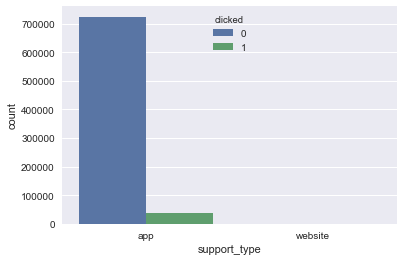

In [29]:
sns.countplot(x='support_type', hue='clicked', data=train)

The *website support_type* has 109 instances of which they all have a "clicked = 0". it doesn't add to the information about the target class, better discard this feature

In [30]:
drop_features(data,'support_type')

In [31]:
train.head()

,bidfloor,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked
0,200000000,fr_FR,iphone,1494,1462,105,937,280000000,116000000,0
1,1000000,tr_TR,iphone,408,1462,1109,16,280000000,195000000,0
2,199000000,fr_FR,ipod,937,926,1462,1536,280000000,241000000,0
3,190000000,fr_FR,iphone,937,1462,1536,1461,280000000,137000000,0
4,188000000,fr_FR,iphone,61,13,299,0,280000000,188000000,0


In [32]:
train['device_model'].value_counts()

iphone    707555
ipod       54684
Name: device_model, dtype: int64

In [33]:
train.groupby('device_model')['clicked'].sum()

device_model
iphone    35513
ipod       2340
Name: clicked, dtype: int64

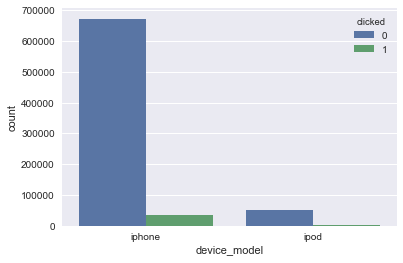

In [34]:
sns.countplot(x='device_model', hue='clicked', data=train)

*device_model* shows some variation better that *support_type*, we have some information that could be useful for target variable "clicked == 1". thuse, we are simply going to map the classes to binary

In [35]:
data[0]['device_model'] = data[0]['device_model'].map(lambda x: 1 if x=='iphone' else 0)
data[1]['device_model'] = data[1]['device_model'].map(lambda x: 1 if x=='iphone' else 0)

In [36]:
train.head()

,bidfloor,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked
0,200000000,fr_FR,1,1494,1462,105,937,280000000,116000000,0
1,1000000,tr_TR,1,408,1462,1109,16,280000000,195000000,0
2,199000000,fr_FR,0,937,926,1462,1536,280000000,241000000,0
3,190000000,fr_FR,1,937,1462,1536,1461,280000000,137000000,0
4,188000000,fr_FR,1,61,13,299,0,280000000,188000000,0


In [37]:
# language
devicelanguage_train = set(train['device_language'].unique())
devicelanguage_test  = set(test['device_language'].unique())

In [38]:
print('Train has {} unique languages\nTest has {} unique languages'.format(len(devicelanguage_train), len(devicelanguage_test)))

Train has 52 unique languages
Test has 53 unique languages


In [39]:
devicelanguage_train = set(train['device_language'].unique())
devicelanguage_test  = set(test['device_language'].unique())
language_intersection  = [x for x in devicelanguage_test if x in devicelanguage_train]
extra_language = [x for x in devicelanguage_test if x not in devicelanguage_train]
print('there are {} comon lanaguages and {} that are in the test but not in the train\n{}'.format(len(language_intersection),len(extra_language),extra_language))

there are 49 comon lanaguages and 4 that are in the test but not in the train
['gu_GU', 'sh_SH', 'kn_KN', 'bg_BG']


In [40]:
train['device_language'].value_counts(normalize=True)*100

fr_FR    95.676159
en_EN     2.106295
tr_TR     0.880826
zh_CN     0.184850
it_IT     0.162941
nl_NL     0.131192
pt_PT     0.122796
es_ES     0.119385
de_DE     0.117680
ru_RU     0.106266
ar_AR     0.089080
ro_RO     0.054051
ja_JA     0.032405
pl_PL     0.027288
ko_KO     0.025189
sv_SV     0.023090
th_TH     0.020335
no_NO     0.012594
zh_TW     0.012332
da_DA     0.012201
vi_VI     0.011151
iw_IW     0.011151
co_CO     0.007609
hr_HR     0.006822
el_EL     0.006822
uk_UK     0.006428
hy_HY     0.005248
bn_BN     0.005117
eu_EU     0.003411
ta_TA     0.003149
sq_SQ     0.002230
hu_HU     0.002230
ca_CA     0.001706
bs_BS     0.001443
cs_CS     0.001181
km_KM     0.001050
fa_FA     0.001050
lo_LO     0.000918
fi_FI     0.000918
ka_KA     0.000656
sk_SK     0.000656
br_BR     0.000525
mn_MN     0.000262
ne_NE     0.000262
mg_MG     0.000131
yi_YI     0.000131
pa_PA     0.000131
id_ID     0.000131
ln_LN     0.000131
la_LA     0.000131
ht_HT     0.000131
ur_UR     0.000131
Name: device

In [41]:
test['device_language'].value_counts(normalize=True)*100

fr_FR    95.144030
en_EN     2.454158
tr_TR     0.901098
it_IT     0.207613
zh_CN     0.201512
nl_NL     0.168058
de_DE     0.144837
es_ES     0.128307
pt_PT     0.126732
ar_AR     0.095443
ru_RU     0.083635
ro_RO     0.048804
ja_JA     0.038571
th_TH     0.034635
ko_KO     0.033257
sv_SV     0.030109
zh_TW     0.022434
pl_PL     0.021647
da_DA     0.012988
fa_FA     0.011611
hu_HU     0.010233
no_NO     0.009249
el_EL     0.008856
vi_VI     0.008856
uk_UK     0.008068
co_CO     0.007478
ta_TA     0.005313
hr_HR     0.004920
iw_IW     0.003345
bn_BN     0.002952
cs_CS     0.002558
eu_EU     0.002558
ca_CA     0.001968
sq_SQ     0.001771
gu_GU     0.001574
hy_HY     0.001378
pa_PA     0.001378
sk_SK     0.000984
mg_MG     0.000787
sh_SH     0.000787
la_LA     0.000590
lo_LO     0.000590
fi_FI     0.000590
km_KM     0.000590
yi_YI     0.000394
kn_KN     0.000394
ht_HT     0.000394
bg_BG     0.000394
ln_LN     0.000394
ka_KA     0.000394
br_BR     0.000394
bs_BS     0.000197
mn_MN     0.

device language shows high cardinality, however, when looking at the distribution of classes, we see that ***French***
is predominant by **95%**, then ***English*** with **2%**, then the rest with approximately **2%**, and it is observed in both train and test dataset. 
since we saw that the test dataset has 4 languages that don't exist in train set, one way to solve this is to create three classes: *French, English and Others*

#### mapping device_model and device_language

In [42]:
def language_map(lang):
    if lang not in ['fr_FR','en_EN']:
        return 'other'
    elif lang in ['fr_FR']:
        return 'fr'
    else:
        return 'en'
        

In [43]:
data[0]['device_language'] = data[0]['device_language'].apply(language_map)
data[1]['device_language']  = data[1]['device_language'].apply(language_map)

In [44]:
lang = pd.get_dummies(data[0]['device_language'], prefix='lang')
data[0]= pd.concat([data[0],lang],axis=1)
lang = pd.get_dummies(data[1]['device_language'], prefix='lang')
data[1]= pd.concat([data[1],lang],axis=1)

In [45]:
train, test = data[0], data[1]

In [46]:
drop_features(data,['device_language'])

In [47]:
train.head()

,bidfloor,device_model,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked,lang_en,lang_fr,lang_other
0,200000000,1,1494,1462,105,937,280000000,116000000,0,0,1,0
1,1000000,1,408,1462,1109,16,280000000,195000000,0,0,0,1
2,199000000,0,937,926,1462,1536,280000000,241000000,0,0,1,0
3,190000000,1,937,1462,1536,1461,280000000,137000000,0,0,1,0
4,188000000,1,61,13,299,0,280000000,188000000,0,0,1,0


#### bidfloor, bid_price, won_price

In [48]:
# Make sure the all columns that contain monetary value are of float type
name = ['train','test']
for d,n in zip(data,name):
    print(10*'-',n,10*'-')
    for col in ['bid_price','won_price','bidfloor']:
        print('The type of {} is {}'.format(col,d[col].dtype))
        d[col] = d[col].astype('float64')
        print('The new type of {} is {}'.format(col,d[col].dtype))
        print('-'*40)

---------- train ----------
The type of bid_price is int64
The new type of bid_price is float64
----------------------------------------
The type of won_price is int64
The new type of won_price is float64
----------------------------------------
The type of bidfloor is int64
The new type of bidfloor is float64
----------------------------------------
---------- test ----------
The type of bid_price is int64
The new type of bid_price is float64
----------------------------------------
The type of won_price is int64
The new type of won_price is float64
----------------------------------------
The type of bidfloor is int64
The new type of bidfloor is float64
----------------------------------------


In [49]:
# check if prices have negative values
for col in ['bidfloor','bid_price','won_price']:
    print(col)
    print(sum(data[0][col]<0))
    print(sum(data[1][col]<0))
    print('-'*15)

bidfloor
0
0
---------------
bid_price
0
0
---------------
won_price
290
58
---------------


In [50]:
# replacing the negative values with average price
for col in ['won_price']:
    data[0][col] = data[0][col].apply(lambda x: data[0][col].mean() if x<0 else x)
    data[1][col] = data[1][col].apply(lambda x: data[0][col].mean() if x<0 else x)
    

In [51]:
for col in ['bidfloor','bid_price','won_price']:
    print(col)
    print(sum(data[0][col]<0))
    print(sum(data[1][col]<0))
    print('-'*15)

bidfloor
0
0
---------------
bid_price
0
0
---------------
won_price
0
0
---------------


In [52]:
train.head()

,bidfloor,device_model,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked,lang_en,lang_fr,lang_other
0,200000000.0,1,1494,1462,105,937,280000000.0,116000000.0,0,0,1,0
1,1000000.0,1,408,1462,1109,16,280000000.0,195000000.0,0,0,0,1
2,199000000.0,0,937,926,1462,1536,280000000.0,241000000.0,0,0,1,0
3,190000000.0,1,937,1462,1536,1461,280000000.0,137000000.0,0,0,1,0
4,188000000.0,1,61,13,299,0,280000000.0,188000000.0,0,0,1,0


#### verticals_0, verticals_1, verticals_2, vertical_3

In [53]:
train_v = train[['verticals_0','verticals_1','verticals_2','vertical_3']]

In [54]:
verticals = pd.read_csv('data/verticals.csv')

In [55]:
verticals.head()

,Category,Criterion ID,Parent ID
0,Arts & Entertainment,3,0
1,Celebrities & Entertainment News,184,3
2,Comics & Animation,316,3
3,Anime & Manga,317,316
4,Cartoons,319,316


In [56]:
cardinality(['train',train_v],'verticals_0','verticals_1','verticals_2','vertical_3')

Calculating cardinality for train

cardinality of verticals_0 is 333
cardinality of verticals_1 is 283
cardinality of verticals_2 is 248
cardinality of vertical_3 is 183


In [57]:
cardinality(['verticals',verticals],'Criterion ID','Parent ID')

Calculating cardinality for verticals

cardinality of Criterion ID is 2221
cardinality of Parent ID is 572


First we will make a transformation on every vertical using supervised ratio

In [58]:
v0 = pd.DataFrame(train_v['verticals_0'].value_counts(normalize=True)).reset_index()

v0_dic = {}
for row in v0.itertuples():
    v0_dic[row[1]] = row[2]


In [59]:
v0.head()

,index,verticals_0
0,926,0.183504
1,937,0.175804
2,1494,0.118001
3,220,0.079213
4,61,0.074630


In [60]:
def vert_trans(x):
    return v0_dic[x]

In [61]:
train_v['sr_v0'] = train_v['verticals_0'].apply(vert_trans)

f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
train_v.head()

,verticals_0,verticals_1,verticals_2,vertical_3,sr_v0
0,1494,1462,105,937,0.118001
1,408,1462,1109,16,0.003862
2,937,926,1462,1536,0.175804
3,937,1462,1536,1461,0.175804
4,61,13,299,0,0.074630


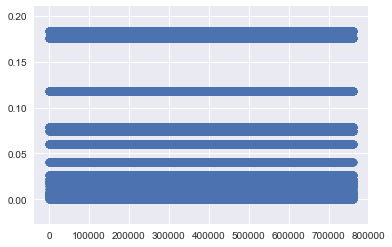

In [63]:
plt.scatter(range(len(train)),(train_v['sr_v0']))

Next, we use a log transformation

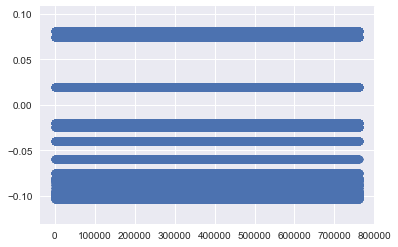

In [64]:
plt.scatter(range(len(train)),(train_v['sr_v0']-train_v['sr_v0'].mean()).apply(lambda x: log(x+1)))

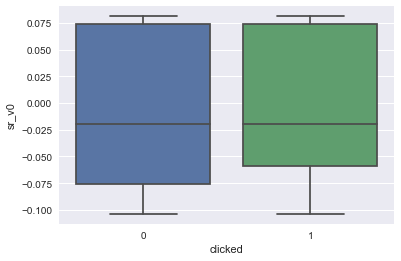

In [65]:
sns.boxplot(x=train['clicked'],y=(train_v['sr_v0']-train_v['sr_v0'].mean()).apply(lambda x: log((x+1))))

In [66]:
def vert_trans(data, *args):
    for col in args:
        print(col)
        v_train = {}
        v_test = {}
        ver_dics = [v_train,v_test]
        for d,v in zip(data, ver_dics):
            vertical = pd.DataFrame(d[col].value_counts(normalize=True)).reset_index()
            vertical['log_v'] = vertical[col].apply(lambda x: log((x-vertical[col].mean())+1))
            for row in vertical.itertuples():
                v[row[1]] = row[3]
            d['logsr'+'_'+col[-1]] =  d[col].apply(lambda x: v[x])
        


In [67]:
vert_trans(data,'verticals_0','verticals_1','verticals_2','vertical_3')

verticals_0
verticals_1
verticals_2
vertical_3


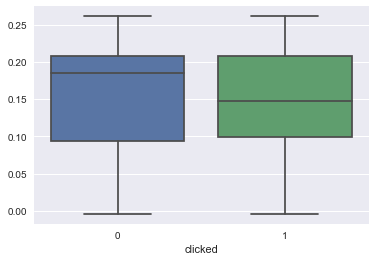

In [68]:
sns.boxplot(x=train['clicked'],y=data[0][['logsr_0','logsr_1','logsr_2','logsr_3']].mean(axis=1))

In [69]:
for d in data:
    d['logsr_mean'] = d[['logsr_0','logsr_1','logsr_2','logsr_3']].mean(axis=1)

In [70]:
train, test = data[0], data[1]

In [71]:
drop_features(data,['verticals_0','verticals_1','verticals_2','vertical_3'])

In [72]:
train.head()

,bidfloor,device_model,bid_price,won_price,clicked,lang_en,lang_fr,lang_other,logsr_0,logsr_1,logsr_2,logsr_3,logsr_mean
0,200000000.0,1,280000000.0,116000000.0,0,0,1,0,0.108853,0.462891,0.158467,0.102446,0.208164
1,1000000.0,1,280000000.0,195000000.0,0,0,0,1,0.000859,0.462891,0.053363,-0.002467,0.128661
2,199000000.0,0,280000000.0,241000000.0,0,0,1,0,0.159395,0.052077,0.108565,0.034875,0.088728
3,190000000.0,1,280000000.0,137000000.0,0,0,1,0,0.159395,0.462891,0.183591,0.177750,0.245907
4,188000000.0,1,280000000.0,188000000.0,0,0,1,0,0.069178,0.072751,0.069696,0.257685,0.117328


### Predictive model

In [73]:
price_train = data[0][['bidfloor','bid_price','won_price']]
catego_train = data[0][['device_model','lang_en','lang_fr','lang_other']]
vert_train = data[0][['logsr_0','logsr_1','logsr_2','logsr_3','logsr_mean']]
target = data[0]['clicked']

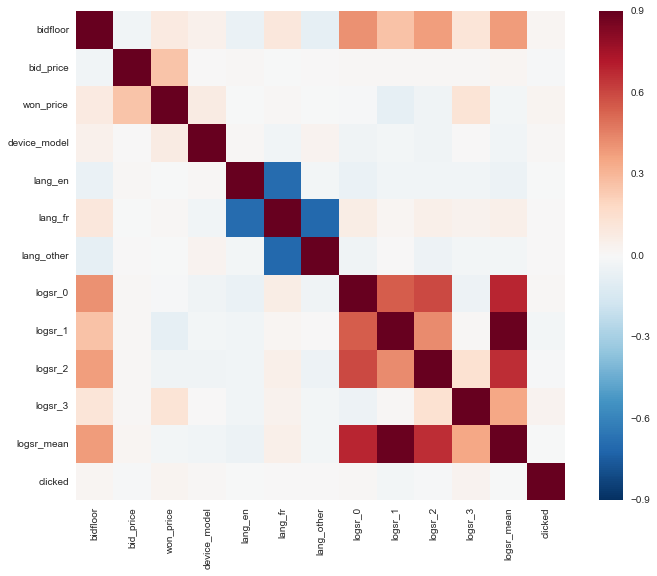

In [74]:
# Look at the correlation matrix
corrmat = pd.concat([price_train,catego_train,vert_train, target],axis=1).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [75]:
# First make a basel line prediction on all the data
X = pd.concat([price_train,catego_train,vert_train],axis=1).values
y = target.values
X_std = RobustScaler(quantile_range=(25, 75)).fit_transform(X)

In [76]:
train['clicked'].value_counts()

0    724386
1     37853
Name: clicked, dtype: int64

In [77]:
lr = LogisticRegression()
%timeit lr.fit(X_std, y)

4.8 s ± 887 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
sklearn.metrics.accuracy_score(y, lr.predict(X_std))

0.95033972284283541

In [79]:
y_pred = lr.predict(X_std)
confmat = confusion_matrix(y_true=y, y_pred=y_pred)
print(confmat)

[[724386      0]
 [ 37853      0]]


In [80]:
print('Precision: %.3f' % precision_score(y_true=y, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y, y_pred=y_pred))

f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.000
Recall: 0.000
F1: 0.000


f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
print (classification_report(y, lr.predict(X_std), target_names=['not clicked', 'clicked']))

             precision    recall  f1-score   support

not clicked       0.95      1.00      0.97    724386
    clicked       0.00      0.00      0.00     37853

avg / total       0.90      0.95      0.93    762239



f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
print(np.unique(lr.predict(X_std)))

[0]


In [83]:
y_pred = lr.predict_proba(X_std)
y_pred = [p[1] for p in y_pred]

In [84]:
print(roc_auc_score(y,y_pred))

0.586049325539


As expected the Accuracy metric doesn't show the full picture, thus, Recall and Area Under the curve. Next we are going to use undersampling and evaluate the performance again

In [85]:
# Function to sample the data with use of propotion
def sampling(data, proportion):
    inx = list(data[data['clicked']==0].index)
    inx = np.random.choice(inx,size=int(len(data[data['clicked']==1])*proportion))
    d_1 = data[data['clicked']==1]
    d_0 = data.iloc[inx]
    d_new = pd.concat([d_1,d_0])
    d_new = d_new.iloc[np.random.permutation(len(d_new))]
    d_new.drop('clicked', axis=1,inplace=True)
    y_new = target.iloc[d_new.index]
    return d_new, y_new

In [86]:
# we under sample the data such that both classe are equally balanced
d_new, y_new = sampling(train, 1)

In [87]:
d_new.shape, y_new.shape

((75706, 12), (75706,))

In [88]:
X_sample = d_new.values
y_sample = y_new.values
X_std_sample = RobustScaler(quantile_range=(25, 75)).fit_transform(X_sample)
lr_sample = LogisticRegression()
%timeit lr_sample.fit(X_std_sample, y_sample)

379 ms ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
y_pred_sample = lr_sample.predict(X_std_sample)
confmat = confusion_matrix(y_true=y_sample, y_pred=y_pred_sample)
print(confmat)

[[21885 15968]
 [17136 20717]]


In [90]:
print('Precision: %.3f' % precision_score(y_true=y_sample, y_pred=y_pred_sample))
print('Recall: %.3f' % recall_score(y_true=y_sample, y_pred=y_pred_sample))
print('F1: %.3f' % f1_score(y_true=y_sample, y_pred=y_pred_sample))

Precision: 0.565
Recall: 0.547
F1: 0.556


In [91]:
print (classification_report(y_sample, lr_sample.predict(X_std_sample)))


             precision    recall  f1-score   support

          0       0.56      0.58      0.57     37853
          1       0.56      0.55      0.56     37853

avg / total       0.56      0.56      0.56     75706



In [92]:
print(np.unique(lr_sample.predict(X_std_sample)))

[0 1]


In [93]:
y_pred_sample = lr_sample.predict_proba(X_std_sample)
y_pred_sample = [p[1] for p in y_pred_sample]

print(roc_auc_score(y_sample,y_pred_sample))

0.586281519165


**First Observation:** undersampling gave a better picture of the predictions, it will be worthy to see the predictions on the full dataset

In [94]:
X = pd.concat([price_train,catego_train,vert_train],axis=1).values
X_std = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
y_pred = lr_sample.predict(X_std)
y = target.values
confmat = confusion_matrix(y_true=y, y_pred=y_pred)


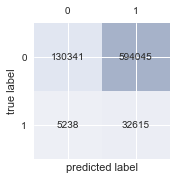

In [95]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [96]:
print('Precision: %.3f' % precision_score(y_true=y, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y, y_pred=y_pred))

Precision: 0.052
Recall: 0.862
F1: 0.098


In [97]:
print (classification_report(y, lr_sample.predict(X_std), target_names=['not clicked', 'clicked']))

             precision    recall  f1-score   support

not clicked       0.96      0.18      0.30    724386
    clicked       0.05      0.86      0.10     37853

avg / total       0.92      0.21      0.29    762239



In [98]:
print(np.unique(lr_sample.predict(X_std)))

[0 1]


In [99]:
y_pred = lr_sample.predict_proba(X_std)
y_pred = [p[1] for p in y_pred]
AUC = roc_auc_score(y,y_pred)

In [100]:
print('The area under the curve is : {}'.format(AUC))

The area under the curve is : 0.5726126031239817


In [101]:
print('out of {} clicked classes {} were predicted correct which represents an accuracy of {:.2f}% with a {:.2f}% AUC'\
      .format(train['clicked'].value_counts()[1],confmat[1][1], confmat[1][1]/train['clicked'].value_counts()[1]*100, AUC*100))

out of 37853 clicked classes 32615 were predicted correct which represents an accuracy of 86.16% with a 57.26% AUC


The scores we had so far are promising. The next steps are: 
- use crossvalidation to reduce error 
- use of bagging with voting ensemble 
- finally make submission

In [102]:
X = pd.concat([price_train,catego_train,vert_train],axis=1).values
y = target.values
X_std = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42, stratify=y)

In [103]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((533567, 12), (533567,), (228672, 12), (228672,))

In [104]:
# Select few algorithms to test
random_state = 21
classifiers = [] # combine all alogorithms in a list
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(BernoulliNB())
classifiers.append(LogisticRegression(random_state=random_state))

In [105]:
# bagging with voting ensemble
bag_classifiers = [] #list of voting classifiers
kfold = KFold(n_splits = 5, shuffle=True, random_state=112) # number of folds for crossvalidation
f = int(X_train.shape[0]/X_train[y_train==1].shape[0]) # number of bags
k = X_train[y_train==1].shape[0] # length of 
X_1,y_1 = X_train[y_train==1],y_train[y_train==1]
X_0,y_0 = X_train[y_train==0],y_train[y_train==0]
scores=[]
for i in range(f):
    X_cv= X_0[i*k:(i+1)*k]
    X_cv = np.vstack((X_1,X_cv))
    y_cv = y_0[i*k:(i+1)*k]
    y_cv = np.hstack((y_1,y_cv))
    X_cv , y_cv = shuffle(X_cv, y_cv, random_state=0)
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_cv, y_cv, test_size=0.1, random_state=55)
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train_new, y_train_new, test_size=0.1, random_state=56)
    val_clf=[]
    w = [1,1,1]
    r_score = 0
    pos = 0
    for i,classifier in enumerate(classifiers):
        classifier.fit(X_train_new,y_train_new)
        if recall_score(y_val,classifier.predict(X_val)) > r_score:
            pos = i
            score = recall_score(y_val,classifier.predict(X_val))
        val_clf.append(classifier)
    
    for i,j in enumerate(w):
        if i == pos:
            w[i] = 3
        else:
            w[i] = 1                                            
        
    votingC = VotingClassifier(estimators=[('rfc', val_clf[0]), ('NB', val_clf[1]),
                                           ('LR', val_clf[2])], voting='soft', n_jobs=-1)

    votingC = votingC.fit(X_val, y_val)
    print('Cross validation recall score: {}\n Test recall score: {}'.format(recall_score(y_true=y_val, y_pred=votingC.predict(X_val)),recall_score(y_true=y_test_new, y_pred=votingC.predict(X_test_new))))
    bag_classifiers.append(votingC)
    scores.append(recall_score(y_true=y_test_new, y_pred=votingC.predict(X_test_new)))
        

        

Cross validation recall score: 0.8811509591326105
 Test recall score: 0.5840607210626186
Cross validation recall score: 0.8936613844870726
 Test recall score: 0.6003795066413662
Cross validation recall score: 0.8874061718098415
 Test recall score: 0.603415559772296
Cross validation recall score: 0.8840700583819849
 Test recall score: 0.5681214421252372
Cross validation recall score: 0.8894912427022519
 Test recall score: 0.5753320683111954
Cross validation recall score: 0.871976647206005
 Test recall score: 0.5855787476280835
Cross validation recall score: 0.8932443703085905
 Test recall score: 0.581404174573055
Cross validation recall score: 0.8853211009174312
 Test recall score: 0.5776091081593928
Cross validation recall score: 0.8853211009174312
 Test recall score: 0.5878557874762809
Cross validation recall score: 0.8786488740617181
 Test recall score: 0.5893738140417457
Cross validation recall score: 0.896163469557965
 Test recall score: 0.5924098671726755
Cross validation recall s

In [106]:
print('Average test recall score: {} +/- {}'.format(np.mean(scores),np.std(scores)))

Average test recall score: 0.6079316888045541 +/- 0.09060604030757144


Using (Train, Validation, Test) configuration to evaluate different models shows clearly that the 87% recall score we had at first was due to overfitting, and we would expect the real score to be around 60%. Next we select the best classifier that gives high recall score with the overall test data (Note: test data has ben split using stratification such that we have a class balance approximately similar to original data)

In [107]:
# Remove last one to avoid overfiting
bag_classifiers.remove(bag_classifiers[-1])

In [108]:
# Select best classifier with test data
best_clf = [[0,0]]
best_score=0
for clf in bag_classifiers:
    score=recall_score(y_test,clf.predict(X_test))
    print('Recall score: {}'.format(score))
    if score> best_score:
        best_clf[0][0]=clf
        best_clf[0][1]=score
        best_score = score
    

Recall score: 0.5841845720324058
Recall score: 0.5949277914758718
Recall score: 0.6001232828460725
Recall score: 0.5758189503346248
Recall score: 0.5937830221909123
Recall score: 0.5877949982388165
Recall score: 0.6030292356463544
Recall score: 0.5877949982388165
Recall score: 0.5947516731243395
Recall score: 0.596600915815428
Recall score: 0.5906128918633322
Recall score: 0.5971292708700247
Recall score: 0.591229306093695
Recall score: 0.6053187742162733
Recall score: 0.587442761535752
Recall score: 0.5977456851003875
Recall score: 0.6076083127861923
Recall score: 0.5818069742867207
Recall score: 0.594311377245509


In [109]:
print('The best classifier recall score {:.2f}% and AUC is {:.2f}%'.format(best_clf[0][1]*100,roc_auc_score(y_test,best_clf[0][0].predict(X_test))*100))

The best classifier recall score 60.76% and AUC is 58.14%


Now instead of looking at only one of them, we use majority vote

In [110]:
def maj_vote(X_test,bag_classifiers):
    X_meta = np.ones(X_test.shape[0])
    for clf in bag_classifiers:
        y_pred = clf.predict(X_test)
        X_meta = np.vstack((X_meta,y_pred))
    X_meta = X_meta[1:].T
    y_maj = []
    for i,j in enumerate(X_meta):
        coun = {0:0,1:0}
        for el in j:
            coun[el] += 1
        if coun[0]<coun[1]:
            y_maj.append(1)
        else:
            y_maj.append(0)
    y_maj = np.array(y_maj)
    return y_maj

In [111]:
y_maj = maj_vote(X_test,bag_classifiers)

In [112]:
y_maj

array([0, 0, 0, ..., 0, 0, 1])

In [113]:
print('Voting ensemble recall score {:.2f}% and AUC is {:.2f}%'.format(recall_score(y_test,y_maj)*100,roc_auc_score(y_test,y_maj)*100))

Voting ensemble recall score 60.85% and AUC is 58.66%


The recall score and area under the curve have both improved, which is a behavior that we would expect from majority vote. This is the model that we are going to use for final submissions

Note that there are improvemements to do such : features engineering and features selection, hyper paramters tunning,neural networks, better meta model and stacking architecture

In [114]:
X_submission = RobustScaler(quantile_range=(25, 75)).fit_transform(data[1].values)
Y_test = maj_vote(X_submission,bag_classifiers)

In [115]:
#Y_test = best_clf[0][0].predict(RobustScaler(quantile_range=(25, 75)).fit_transform(data[1].values))
test = pd.DataFrame({'bidid':test_id, 'clicked':Y_test})

test.to_csv( 'Big_mama_test_submission.csv' , float_format='%.f', index = False )

In [116]:
test.shape

(508158, 2)

In [117]:
test['clicked'].value_counts(normalize=True)

0    0.636458
1    0.363542
Name: clicked, dtype: float64

In [118]:
test.head()

,bidid,clicked
0,VUAbtwAKfUwKG+JOugBfTw==,0
1,VUAbuAANjzkKwo3v1AB++g==,0
2,VUAbuQAA39MKwuUk0wBMBQ==,0
3,VUAbuQAB6HoKG+HGlQAW1w==,1
4,VUAbuQAJO6cKGxPLvQB1Sw==,0
